# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [46]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [48]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [49]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [50]:
# Extract all rows of data
table = soup.find('table', class_='table')

# Find all rows in the table
rows = table.find_all('tr')
headers = table.find_all('th')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [51]:

# Create an empty list
mars_data = []
# Loop through the rows
for row in rows[1:]:# Skip the header row
  cols = row.find_all('td')
  if cols:
        row_data = {
            'id': cols[0].get_text(strip=True),
            'terrestrial_date': cols[1].get_text(strip=True),
            'sol': cols[2].get_text(strip=True),
            'ls': cols[3].get_text(strip=True),
            'month': cols[4].get_text(strip=True),
            'min_temp': cols[5].get_text(strip=True),
            'pressure': cols[6].get_text(strip=True)
        }# Loop through the scraped data to create a list of rows
        mars_data.append(row_data)




In [52]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data)



In [53]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [54]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [55]:
# Change data types for data analysis
# Convert 'min_temp' and 'pressure' to numeric (float) types
mars_df = mars_df.astype({"id": int,
                "terrestrial_date": "datetime64[ns]",
                "sol": int,
                "ls": int,
                "month": int,
                "min_temp": float,
                "pressure": float})

In [56]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [57]:
# 1. How many months are there on Mars?

months=mars_df["month"].nunique()
months

12

In [58]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = mars_df["sol"].nunique()
unique_sols

1867

In [59]:
# 3. What is the average minimum temperature by month?
average_min_temp=mars_df.groupby('month')['min_temp'].mean()
average_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

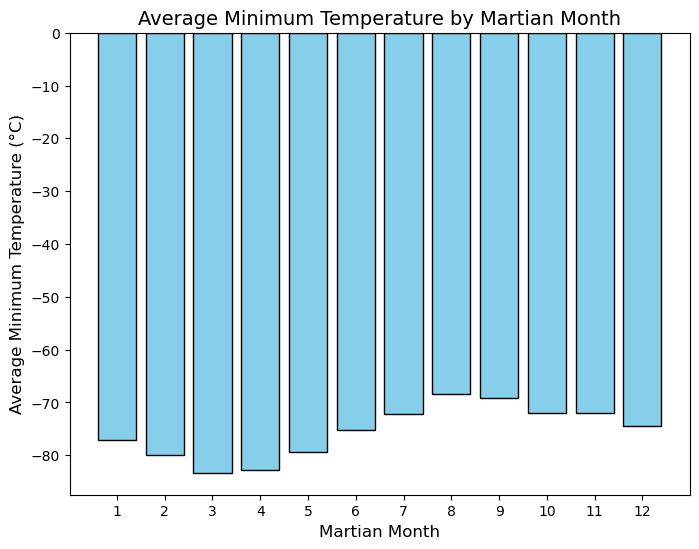

In [60]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(average_min_temp.index, average_min_temp.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average Minimum Temperature by Martian Month', fontsize=14)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)


# Show the plot
plt.xticks(average_min_temp.index)  # Set x-ticks to match Martian months
plt.savefig("Images/Ave_temp_Unsorted.png")
plt.show()



The coldest month is 3
The hottest_month is 8


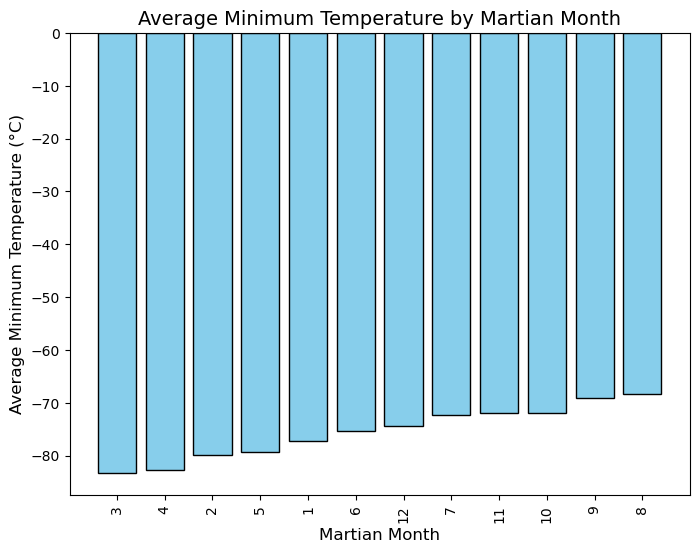

In [61]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the data by temperature values (but keep the original month order)
sorted_avg_min_temp = average_min_temp.sort_values()
coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()
print(f"The coldest month is {coldest_month}")
print(f"The hottest_month is {hottest_month}")
sorted_months = sorted_avg_min_temp.index  # Get the sorted month indices
# Create the bar plot with sorted data
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(range(len(sorted_avg_min_temp)), sorted_avg_min_temp.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average Minimum Temperature by Martian Month', fontsize=14)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.xticks(range(len(sorted_avg_min_temp)), sorted_avg_min_temp.index, rotation=90) # Set x-ticks to match sorted Martian months
plt.savefig("Images/Ave_temp_sorted.png")
plt.show()


In [62]:
# 4. What is the average pressure by month?
average_pressure=mars_df.groupby('month')['pressure'].mean()
average_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

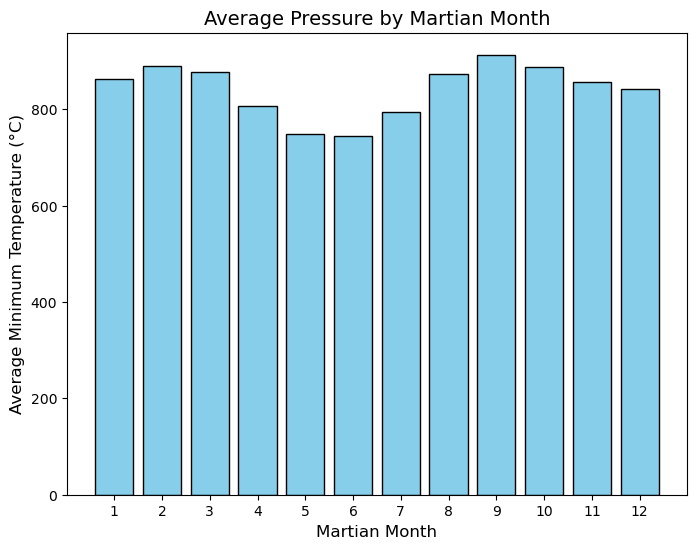

In [63]:
# Plot the average pressure by month
# Plot the average minimum temperature by month
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(average_pressure.index, average_pressure.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average Pressure by Martian Month', fontsize=14)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)


# Show the plot
plt.xticks(average_pressure.index)  # Set x-ticks to match Martian months
plt.savefig("Images/Ave_pressure_Unsorted.png")
plt.show()


The lowest pressure month is 6
The highest pressure month is 9


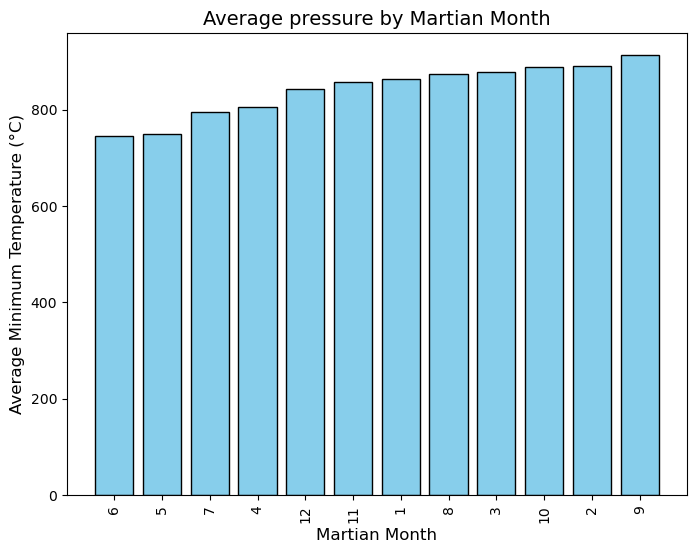

In [64]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = average_pressure.sort_values()
lowest_pressure_month = sorted_pressure.idxmin()
highest_pressure_month = sorted_pressure.idxmax()
print(f"The lowest pressure month is {lowest_pressure_month}")
print(f"The highest pressure month is {highest_pressure_month}")
sorted_months = sorted_pressure.index  # Get the sorted month indices
# Create the bar plot with sorted data
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(range(len(sorted_pressure)), sorted_pressure.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average pressure by Martian Month', fontsize=14)
plt.xlabel('Martian Month', fontsize=12)
plt.ylabel('Average Minimum Temperature (°C)', fontsize=12)

# Show the plot
plt.xticks(range(len(sorted_pressure)), sorted_pressure.index, rotation=90) # Set x-ticks to match sorted Martian months
plt.savefig("Images/Ave_pressure_sorted.png" )
plt.show()



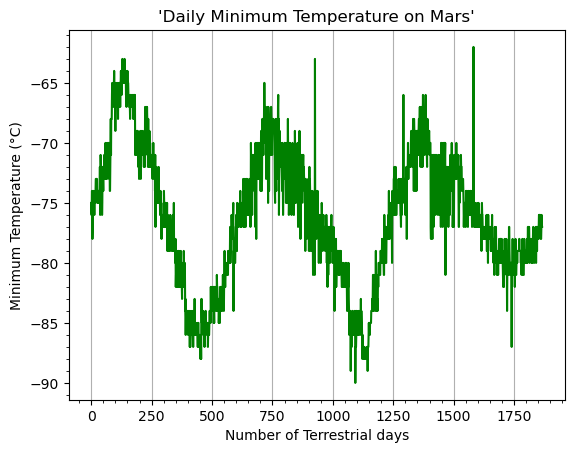

In [65]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
plt.plot( mars_df["min_temp"], color="green")
plt.title("'Daily Minimum Temperature on Mars'")
plt.xlabel("Number of Terrestrial days")
plt.ylabel("Minimum Temperature (°C)")
plt.grid(True, axis='x')

plt.minorticks_on()
plt.savefig("Images/terrestrial_days.png")
plt.show()


# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

Visual estimate number of terrestrial (Earth) days are there in a Martian year  
1 Earth day = 24 hours  
1 Sol = 24 hours 39 minutes 35.244 seconds  
This plot shows how the minimum temperature changes over the Martian days (sols). It gives a visual sense of the temperature variations, and you can observe trends or fluctuations over time.
we can see lot of peaks and valleys  
Peak to peak difference:  
750-100=650 Days  
1450-700=750 Days  
Valley to valley difference:  
1100-450=650 Days  
1750-1100=650 days  
Average days from above data 662.5 days which is very close to the actual number of Earth days,There are 687 Earth days in one Martian year.

#### Minimum Temperature

The temperatures are very cold, ranging from around -83°C in the colder months to around -68°C in the warmer months.  
Month 3 appears to be the coldest with an average minimum temperature of -83.31°C, while Month 8 is the warmest with an average minimum temperature of -68.38°C.  
Martian winter occurs during months 2–3 (coldest months), and the Martian summer peaks in months 7–8 (warmer months).

#### Atmospheric Pressure

The highest atmospheric pressure occurs in Month 9 (913.31), and the lowest pressure occurs in Month 6 (745.05 ).This data shows how the atmosphere changes over the course of a Martian year, with higher pressures during some months and lower pressures during others, likely due to seasonal variations in temperature, atmospheric conditions.

#### Year Length

From your visual estimate, you noted peak-to-peak and valley-to-valley differences of 662.5 sol (e.g., 750 to 100, 1450 to 700 sols), with an average difference of 662.5 sols, which matches the conversion calculation to 680.7 Earth days,which is very close to the actual 687 Earth days that define a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [66]:
# Write the data to a CSV
mars_df.to_csv('Resources/mars_temperature_data.csv')

In [67]:
#browser.quit()